Single spillover branching process with single mutation toggle. Plots probabilities of outbreak.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
###################################################
# simulates infection WITHOUT recurrent spillover 
# allows R0 to mutate between two possible values.          
#
###################################################
#
# input R_0 is transmission rate of the initial/standard variant.
# input R_1 is the transmission rate of the mutated variant.
#
# input mu represents mutation rate.
#
###################################################
#
# returns 0 if extinction
# returns 1 if evolves to mutated pathogen
#
###################################################

def sim(R_0, R_1, mu):
    
    outbreak_thresh = 100 #call it an outbreak if this many people are infected
    
    t = 0
    
    #store number of cases with R_0, number of cases with R_1
    I_0 = 1
    I_1 = 0
    
    while True: 
            
        #branch by one generation.
        #assumes number of secondary infections generated by each individual is poisson distributed!
        I_1 = np.random.poisson(I_0*mu*R_0) + np.random.poisson(I_1*R_1)
        I_0 = np.random.poisson(I_0*(1 - mu)*R_0)
        
        #check if we reached an outbreak:
        if I_0 + I_1 > outbreak_thresh: 
            return 1
                                
        #check if we reached extinction
        if I_0 + I_1 == 0:
            return 0

In [3]:
#########################
# runs many simulations #
#########################
#
# optional input N_sims is number of simulations to run.
#
# returns the percentage of those simulations that outbreak
#
#########################

def sim_percentage(R_0, R_1, mu, N_sims=1000):   
    N_successes = 0  
    for i in range(N_sims):
        if sim(R_0, R_1, mu) == 1: N_successes += 1
    return N_successes/N_sims

In [4]:
# run a single simulation

#parameters
R_0 = 1.5
R_1 = 0
mu = 0

sim(R_0, R_1, mu)

1

In [5]:
# run a bulk simulation

#parameters

R_0 = 1.5
R_1 = 0
mu = 0

sim_percentage(R_0, R_1, mu, N_sims=10)

0.6

In [6]:
#################################################################
# for a fixed mu and R_1, plots the probability of outbreak against R_0 #
#################################################################
#
# inputs mu, R_1
#
# optional inputs R0_min, R0_max give range of R_0 to plot over.
# optional input N_points gives number of points to plot.
# optional inputs N_sims gives number of simulations to run per point.
#
################################################################

def prob_plot(mu, R_1, R0_min=0.0001, R0_max=1.2, N_points = 75, N_sims=10000):

    # initialize arrays to be plotted
    R0 = []; percent = []
    
    # Take some evenly spaced R_0 values
    R0 = np.linspace(R0_min, R0_max, N_points)

    #simulate percentages of outbreak
    for r_0 in R0:
        percent = np.append(percent, sim_percentage(r_0, R_1, mu, N_sims))
        
    #make the plot
    plt.plot(R0, percent, "ob")
    
    #graph with y axis on a log scale!
    plt.yscale("log")
    plt.ylim(0.000001, 1)
    
    plt.show()

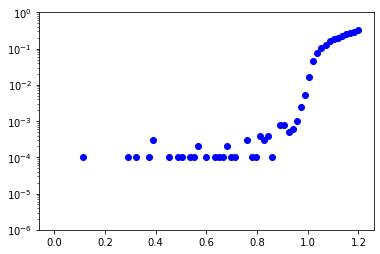

CPU times: user 10 s, sys: 42.4 ms, total: 10 s
Wall time: 10.1 s


In [7]:
%%time

prob_plot(mu=0.0001, R_1 = 1.5)

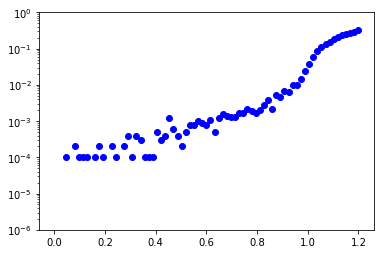

CPU times: user 9.93 s, sys: 21.2 ms, total: 9.95 s
Wall time: 9.98 s


In [8]:
%%time

prob_plot(mu=0.001, R_1 = 1.5)

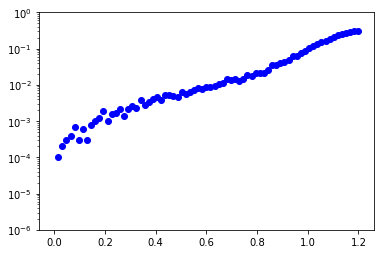

CPU times: user 9.05 s, sys: 17.1 ms, total: 9.07 s
Wall time: 9.09 s


In [9]:
%%time

prob_plot(mu=0.01, R_1 = 1.5)

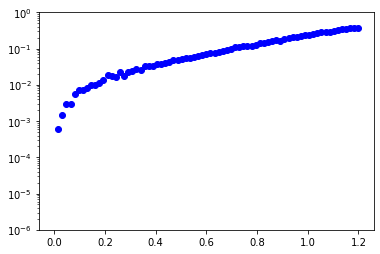

CPU times: user 9.35 s, sys: 14 ms, total: 9.36 s
Wall time: 9.37 s


In [10]:
%%time

prob_plot(mu=0.1, R_1 = 1.5)